---
title: "Error Bars Visualizations"
date: "2025-12-25"
categories: [Python 3, Jupyter Notebook, Scikit-Learn, Numpy, Matplotlib, Physics]
---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](Errorbars.py)

# Error Bars in Atomic Scale
Scientific measurement is often associated with uncertainties, so we need accurate accounting for error analysis. Wherever possible these should be indicated on plots and graphs. Showing the error effectively can make plot convey much more complete information. A dedicated Matplotlib method, `errorbar()` allow this, for full documentation see [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html)

## Prior Data
- Standard Deviation
- Confidence Interval

## Preliminaries (Import pyplot0
```python
import matplotlib.pyplot as plt
import numpy as np
```

## Key arguments
```python
errorbar(x, y, yerr, xerr, fmt, ecolor, elinewidth, capsize, capthick)
```
- `x and y`: the array of N data points to be plotted
- `yerr and xerr`: determine the size of the error bars
- `fmt`: controls the format of the data markers and connecting points, as `plt.plot`
- `ecolor`: sets the color of the error bars
- `elinewidth`: changes the thickness of the error lines
- `capsize`: sets the length of the error bar caps in points (defaults to 0: no error bar caps)
- `capthick`: the thickness the error bar caps.

## Reference:
- [UCD-Physics](https://github.com/UCD-Physics/Python-HowTos/blob/main/Error_Bars.ipynb)
- [Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html#:~:text=In%20visualization%20of%20data%20and,errorbar%20.)
- [Scikit-Learn](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html)

# P10.1 Simple Basic Errorbars
A basic errorbar can create with a single Matplotlib function call. The `errorbar` fucntion has many options to fine-tune the outputs. Using these additional options such as `color`, `capsize`, can easily customize the aesthetics of our errorbar plot. 

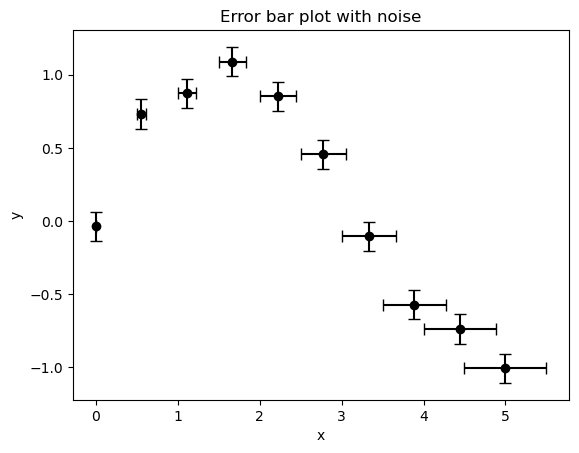

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# The data is y = np.sin(x) + dy * np.random.randn(10)
dy = 0.1
x = np.linspace(0, 5, 10)
y = np.sin(x) + dy * np.random.randn(10)
xerr = x * 0.1

plt.errorbar(x, y, yerr=dy, xerr=xerr, fmt='o', color='black', capsize=4)
plt.xlabel("x") 
plt.ylabel("y") 
plt.title("Error bar plot with noise")
plt.savefig('Error bar with noise.svg', bbox_inches='tight')
plt.show()

# P10.2 Continuous Errors in Ohm's Law
All experimental measurements have some degrees of uncertainty, often referred to as an _error_. Here we'll visualize such a continuous error measurement of _Ohm's Law_.

## Description of Ohm's Law
The current that flows through most subtances is directly proportional to the voltage $V$ applied to it. The German Physicist Georg Simon __Ohm__ (1787-1854) was the first to demonstrate experimentally that the current in a metal wire is __directly proportial to the voltage applied__:
$$
I\;\infty\;V
$$
$$
V\;=\;IR
$$

where $V$ is the voltage measured in volts across the object in question, I is the current measured through the object in amps, and $R$ is the resistance in units of ohms. For full information is [here](https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/University_Physics_II_-_Thermodynamics_Electricity_and_Magnetism_(OpenStax)/09%3A_Current_and_Resistance/9.05%3A_Ohm's_Law)

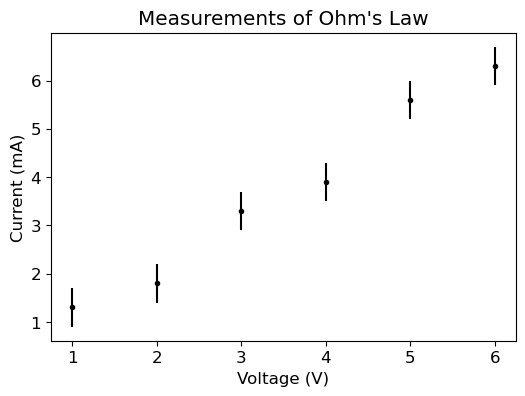

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#set default font and figure sizes
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.bbox'] = 'tight'

# Load a Sample data set
# run cell to download data file
V, I_mA, Ierr_mA = np.loadtxt('data_with_errors.txt', unpack=True)

# Basic Errorbars
plt.errorbar(V, I_mA, Ierr_mA, fmt='.k');

plt.title("Measurements of Ohm's Law")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (mA)")
plt.savefig('Error bar Ohm Law.svg', bbox_inches='tight')
plt.show()


## Overlay theory and errorbars in both dimensions
Let's assume that the Ohm's Law experiment was conducted qith a $1 k\Omega$ and that the voltage measurement had an uncertainty of 0.1 V. We can plot errors in both dimension.

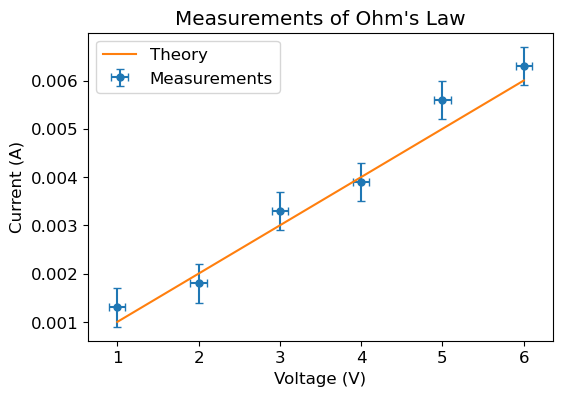

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Load a Sample data set
# run cell to download data file
V, I_mA, Ierr_mA = np.loadtxt('data_with_errors.txt', unpack=True)

# convert I_mA to A
I = I_mA * 1e-3
Ierr = Ierr_mA * 1e-3

R = 1_000
I_Theory = V/R

Verr = np.ones_like(V) * 0.1

# create the errorbars
plt.errorbar(V, I, xerr=Verr, yerr=Ierr, capsize=3, fmt='o', markersize=5, label='Measurements')
plt.plot(V, I_Theory, label='Theory')
plt.title("Measurements of Ohm's Law")
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
plt.legend()
plt.savefig('Error bar Ohm Law bothdimensions.svg', bbox_inches='tight')
plt.show()


# P10.3 Continues Errors in Gaussian Regression
In this work, we will try a simple Gaussian process regression, using the Scikit-Learn API (for details, see [Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)). This method for fitting a very flexible non-paramteric function to data with a continous measure of the uncertainty. 

## Basics of Gaussian Process regression
Gaussing process regression (GPR) is supervised learning menthod used to solve regression and probabilistic classification problems. GPR has been applied to solve several different types of real-world problems, including ones in materials science, chemistry, physics, and biology.

## Python implementation and Scikit-Learn
The Scikit-Learn version is implemented mainly upon NumPy, which is simple and easy to use, but has limited hyperparameter tuning options.

To illustrate how kernel work in GPR, we will look at a simple dataset curated intentionaly. We will start by generating a synthetic dataset. The true generative process is defined.
$$
f(x)\;=\;x\;sin(x)
$$

## Key Arguments
```python
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import numpy as np
import matplotlib.pyplot as plt
```
`GaussianProcessRegressor`: the main class for Gaussian Process regression in scikit-learn.
`RBF`: Radial Basis function kernel (squared exponential kernel)

```python
model = lambda x: x * np.sin(x)
```
`model`: a simple function 

```python
kernel = RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
```
`kernel`: defines the covariance function of Gaussian process


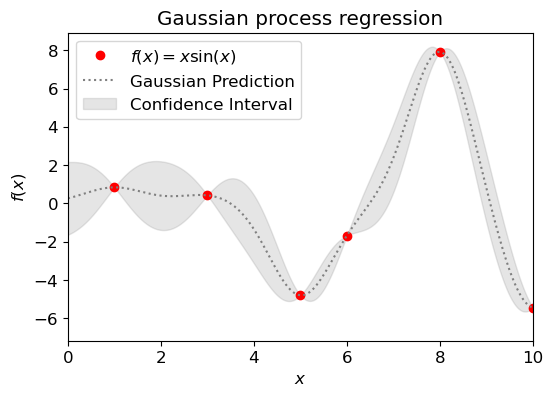

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import numpy as np
import matplotlib.pyplot as plt

# The model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8, 10, 12])
ydata = model(xdata)

# Define kernel (RBF with initial length scale)
kernel = RBF(length_scale=1.0)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

#fit the model
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(start=0, stop=10, num=1000)
yfit, ystd = gp.predict(xfit[:, np.newaxis], return_std=True)

# Visulaize the result
plt.plot(xdata, ydata, 'or', label=r'$f(x) = x \sin(x)$')
plt.plot(xfit, yfit, color='gray', label='Gaussian Prediction', linestyle='dotted')

plt.fill_between(xfit, yfit - 2*ystd, yfit + 2*ystd, color='gray', alpha=0.2, label='Confidence Interval')
plt.xlim(0, 10)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Gaussian process regression')
plt.savefig('Scikit-Learn Gaussian.svg', bbox_inches='tight')
plt.show()
